# Simple Linear Regression (House Price Prediction)

## Explanation

### Objective

To create a machine learning model that can predict a house price, using the Simple Linear Regression algorithm.

### Column Descriptions

- **Square_Footage** = The size of the house in square feet. Larger homes typically have higher prices.
- **Num_Bedrooms** = The number of bedrooms in the house. More bedrooms generally increase the value of a home.
- **Num_Bathrooms** = The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
- **Year_Built** = The year the house was built. Older houses may be priced lower due to wear and tear.
- **Lot_Size** = The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
- **Garage_Size** = The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
- **Neighborhood_Quality** = A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.
- **House_Price** (Target Variable) = The price of the house, which is the dependent variable to predict.

## A. Data Preparation

### A.1 Import Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [14]:
try:
    df = pd.read_csv('house_price.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [15]:
df.shape

(1000, 8)

### A.4 Viewing Data Informations

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


### A.5 Viewing Data Statistics

In [17]:
df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0000,2815.4220,1255.5149,503.0000,1749.5000,2862.5000,3849.5000,4999.0000
Num_Bedrooms,1000.0000,2.9900,1.4276,1.0000,2.0000,3.0000,4.0000,5.0000
Num_Bathrooms,1000.0000,1.9730,0.8203,1.0000,1.0000,2.0000,3.0000,3.0000
Year_Built,1000.0000,1986.5500,20.6329,1950.0000,1969.0000,1986.0000,2004.2500,2022.0000
Lot_Size,1000.0000,2.7781,1.2979,0.5061,1.6659,2.8097,3.9233,4.9893
Garage_Size,1000.0000,1.0220,0.8150,0.0000,0.0000,1.0000,2.0000,2.0000
Neighborhood_Quality,1000.0000,5.6150,2.8871,1.0000,3.0000,6.0000,8.0000,10.0000
House_Price,1000.0000,618861.0186,253568.0584,111626.8534,401648.2289,628267.2911,827141.2776,1108236.8363


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [18]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [19]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


### A.7 Viewing Duplicated Data

In [20]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [21]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

### A.9 Viewing Outlier Data

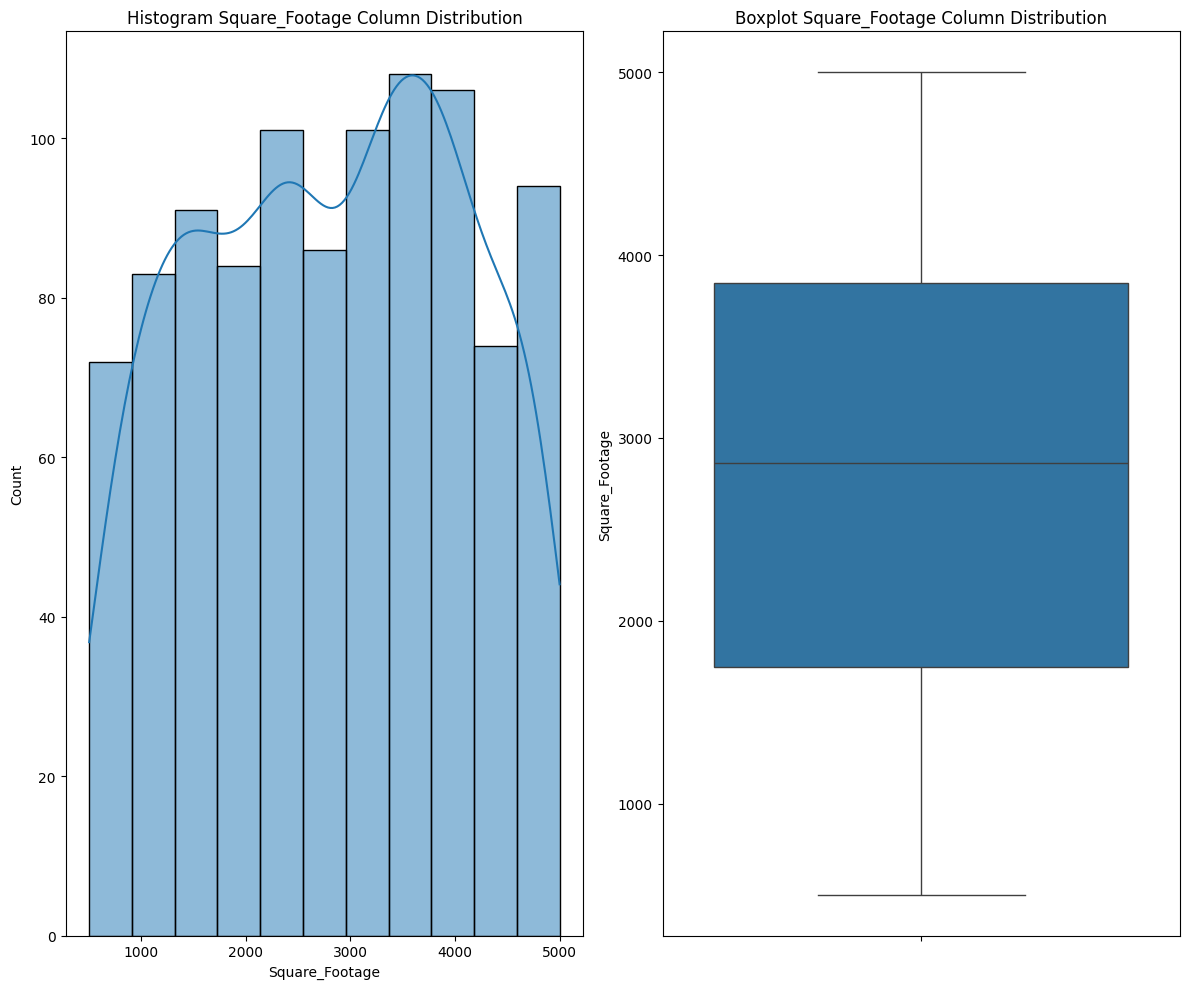

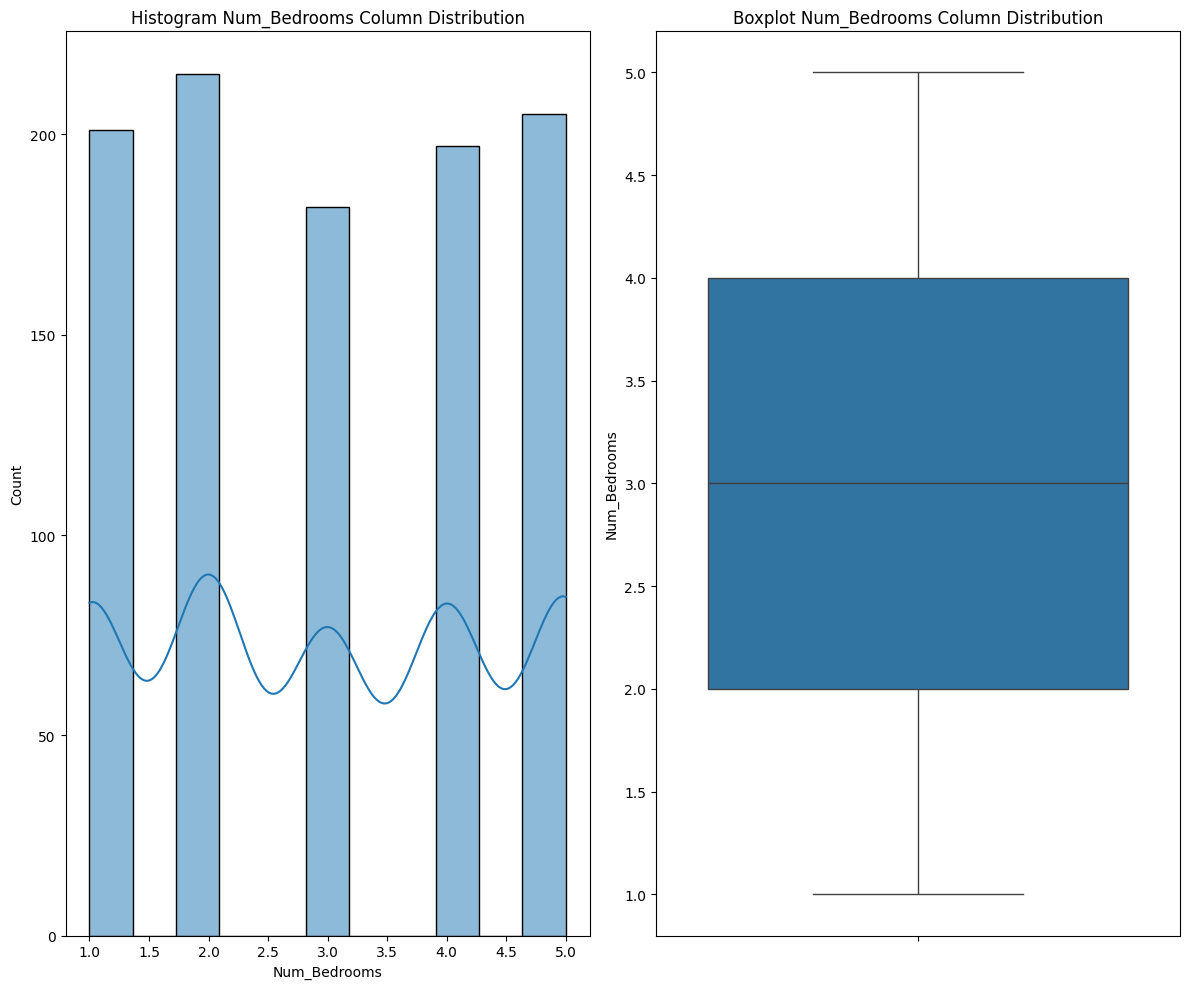

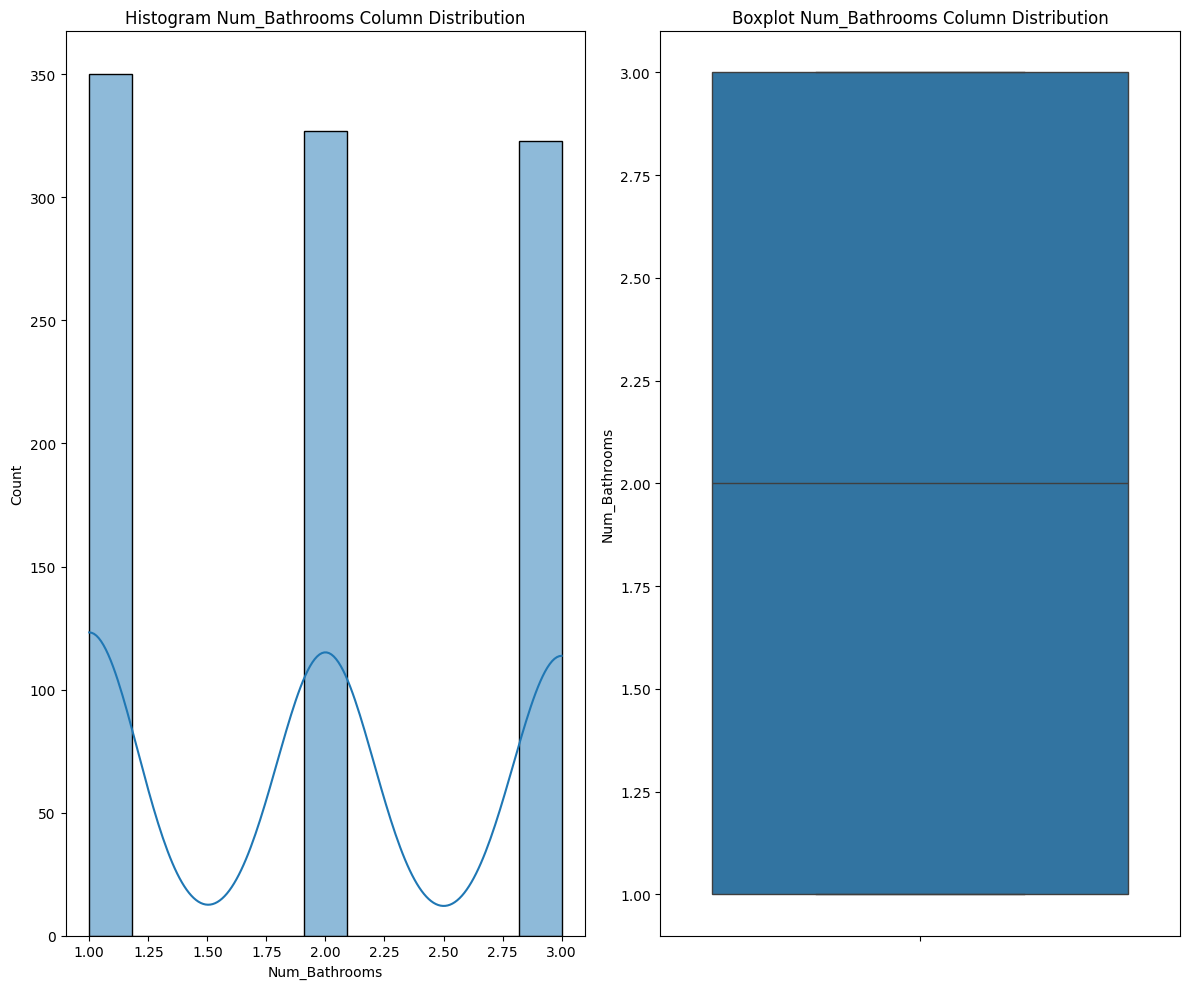

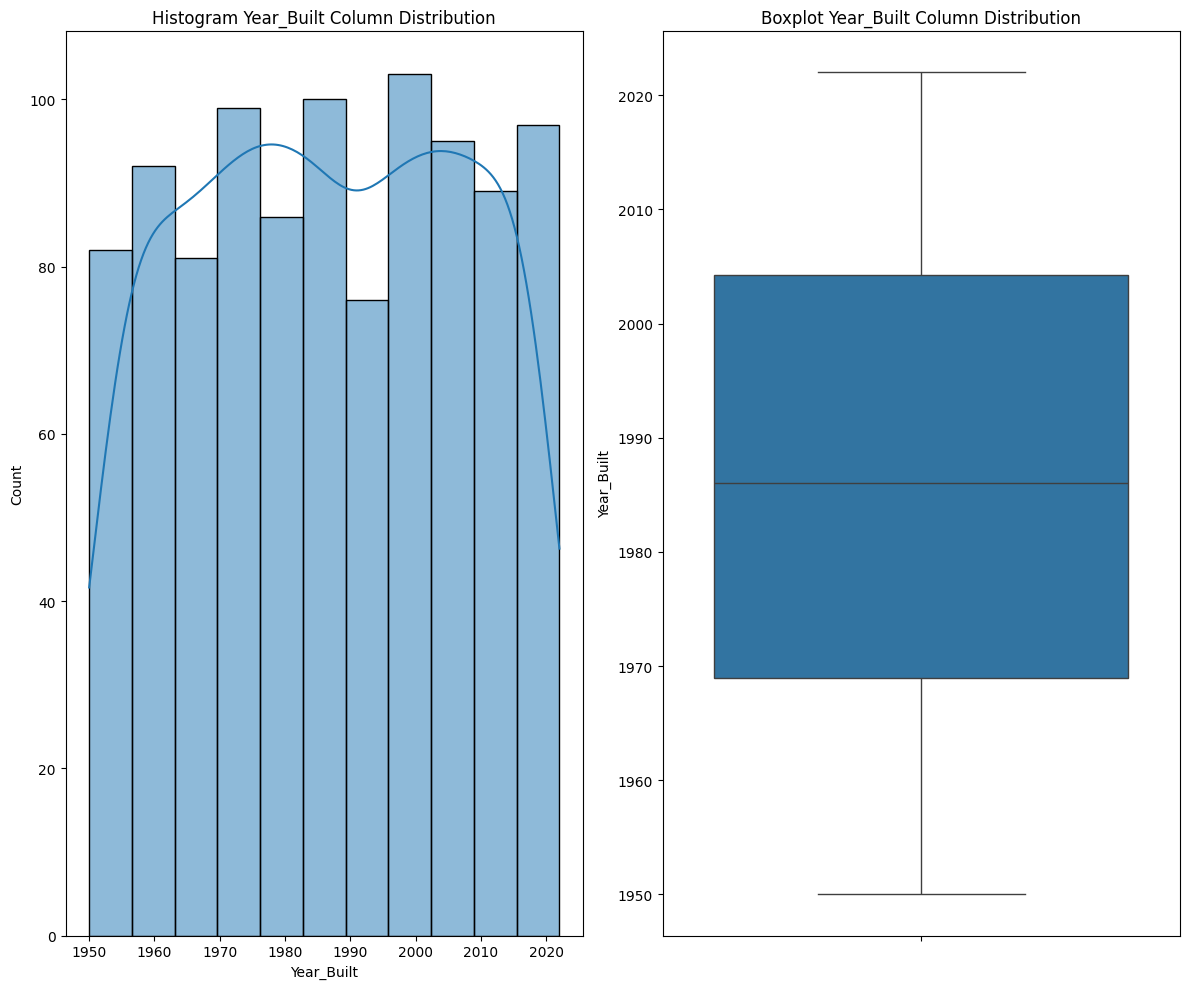

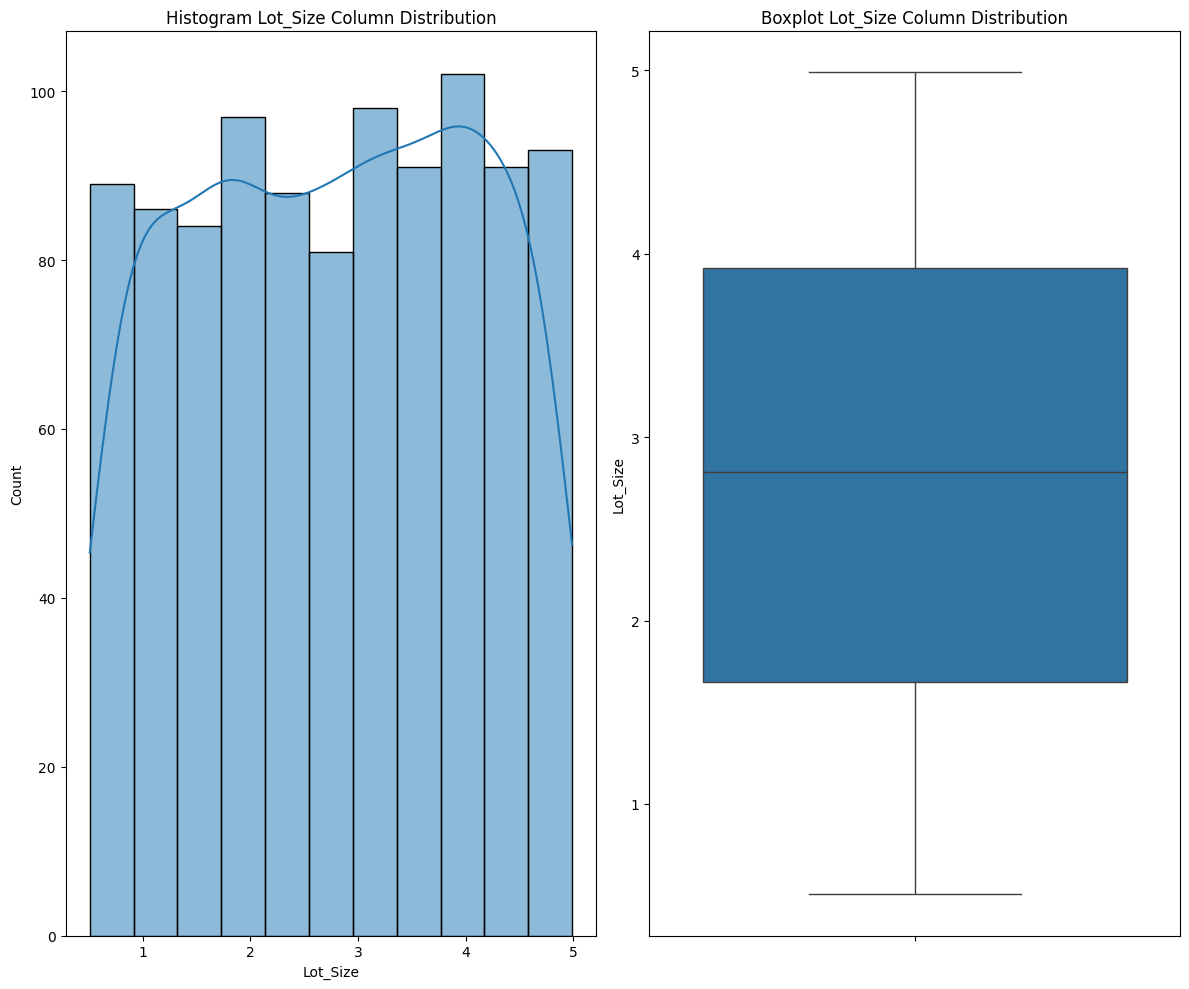

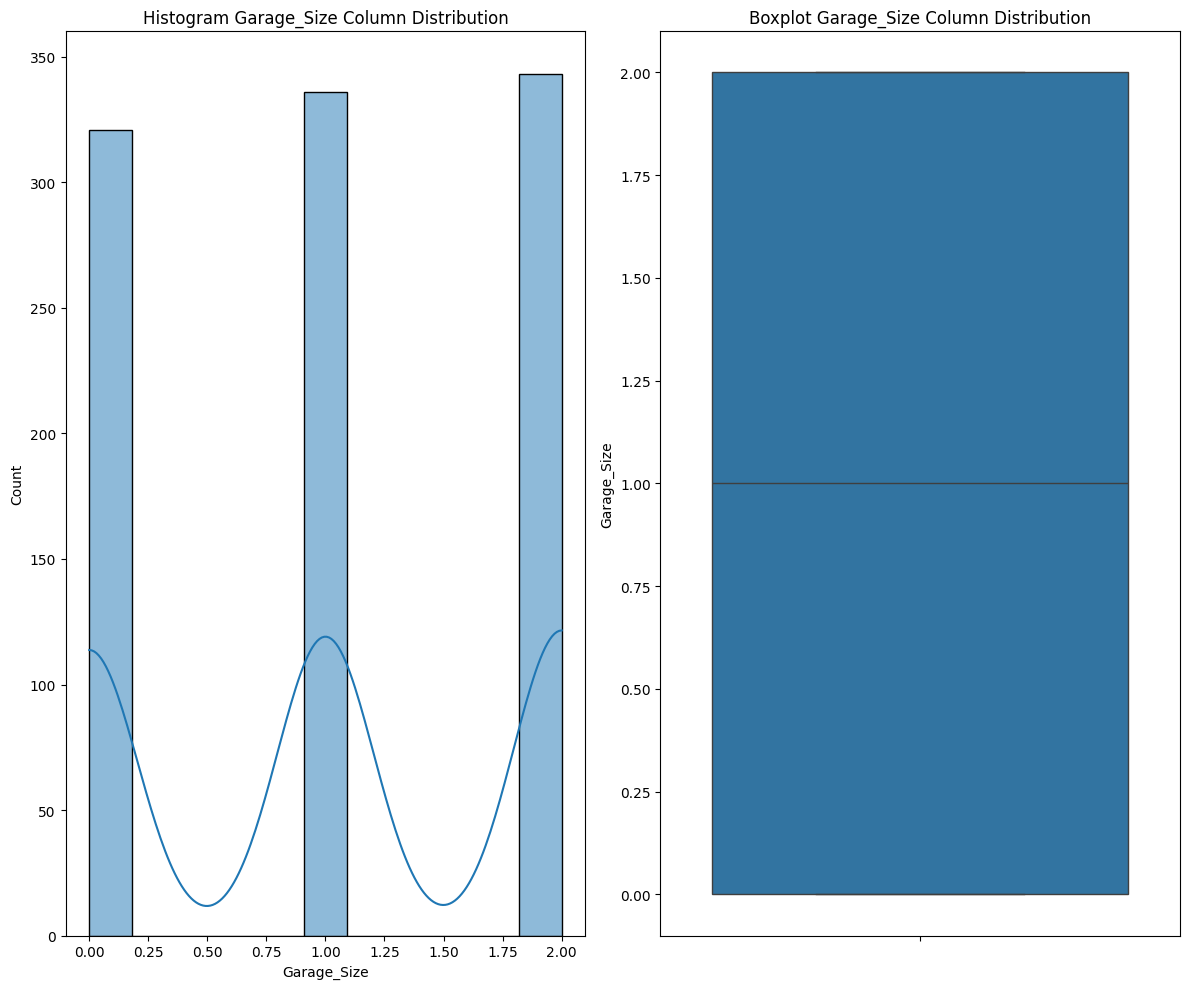

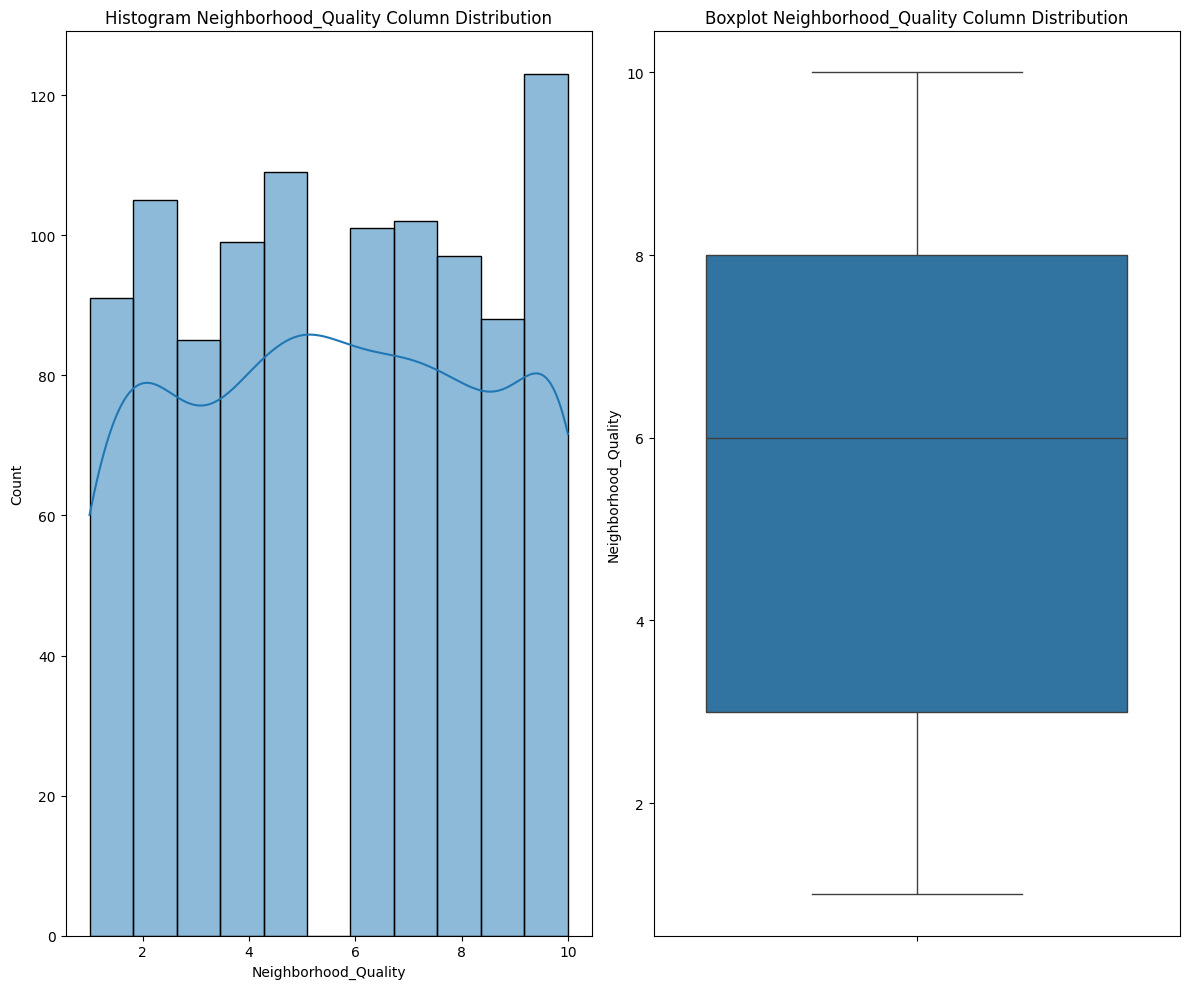

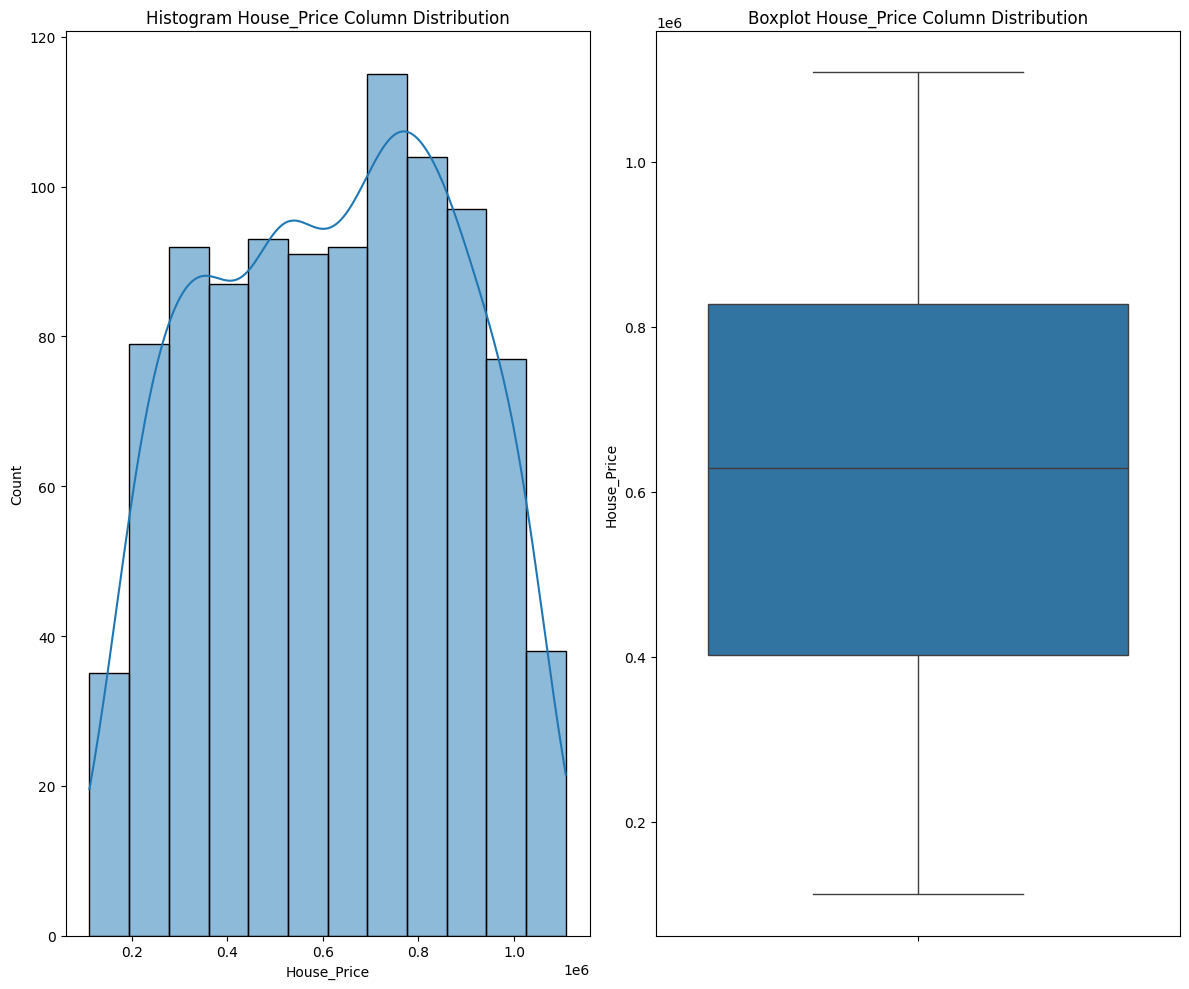

In [23]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram {col} Column Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot {col} Column Distribution")
    plt.tight_layout()

## B. Data Preprocessing

### B.1 Finding Best Column (For Modelling)

In [29]:
df_clean = df[['Square_Footage', 'House_Price']]

## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Column Distributions

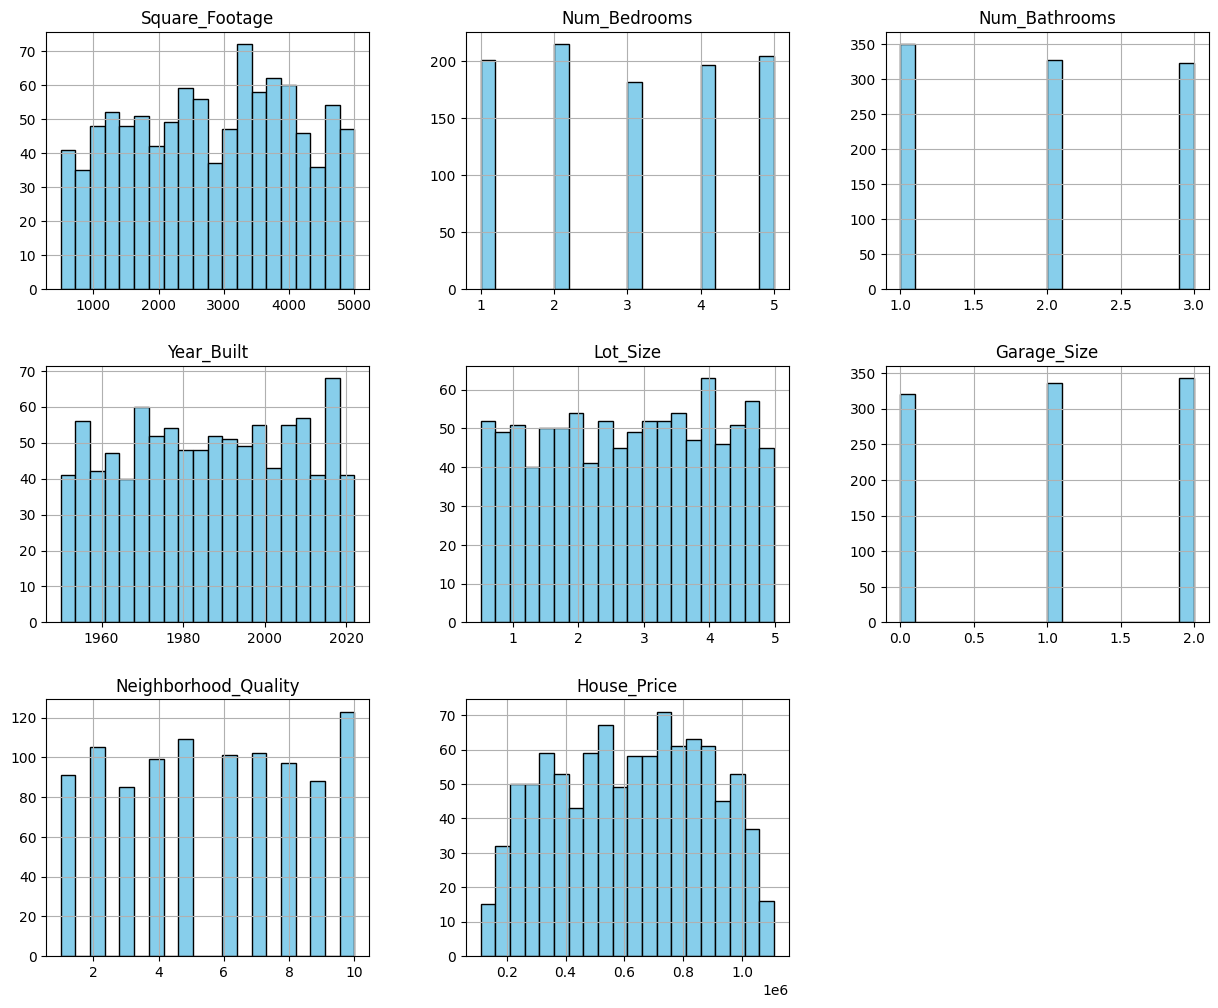

In [35]:
num = df.select_dtypes(include='number')
num.hist(bins=20, color='skyblue', edgecolor='black', figsize=(15, 12))
plt.show()

#### Main Feature & Target Distributions

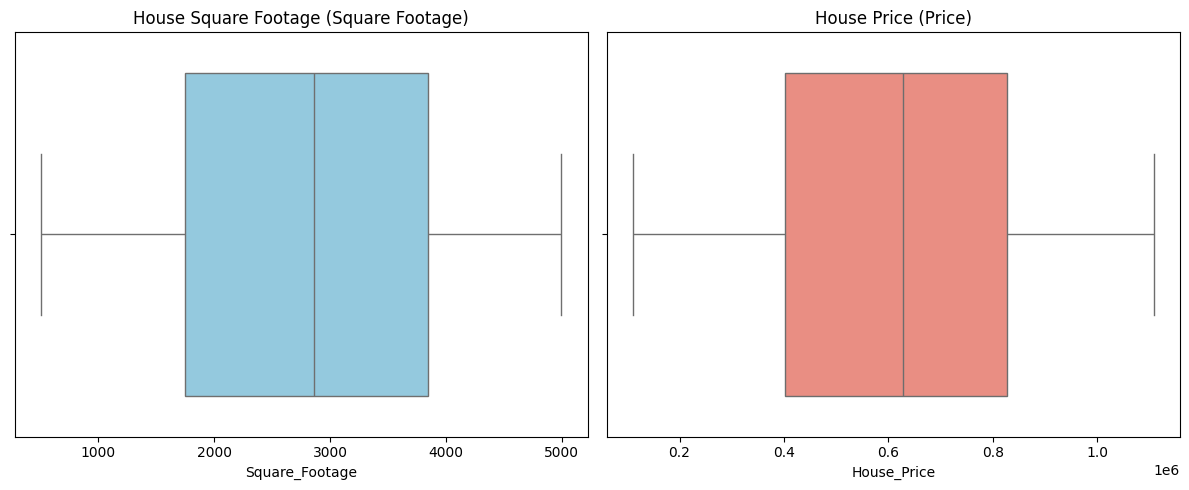

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Square_Footage'], color='skyblue')
plt.title('House Square Footage (Square Footage)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['House_Price'], color='salmon')
plt.title('House Price (Price)')

plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

#### Regplot (Square Footage VS House Price)

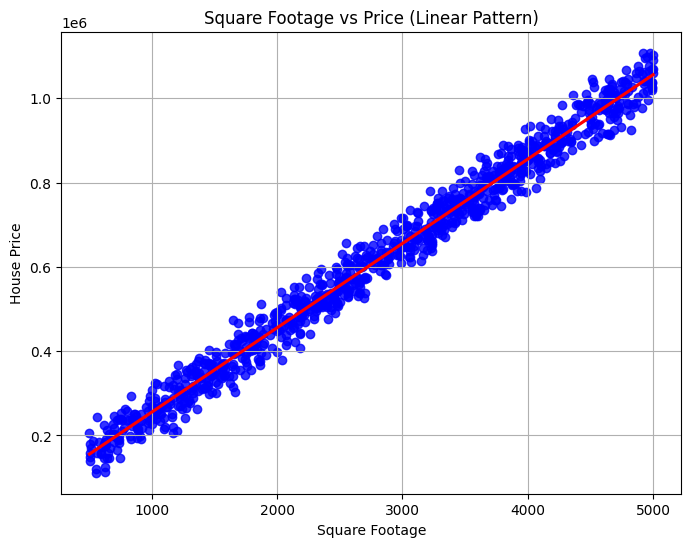

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Square_Footage', y='House_Price', color='blue', line_kws={'color' : 'red'})
plt.title("Square Footage vs Price (Linear Pattern)")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.grid(True)
plt.show()

#### Jointplot (Square Footage VS House Price)

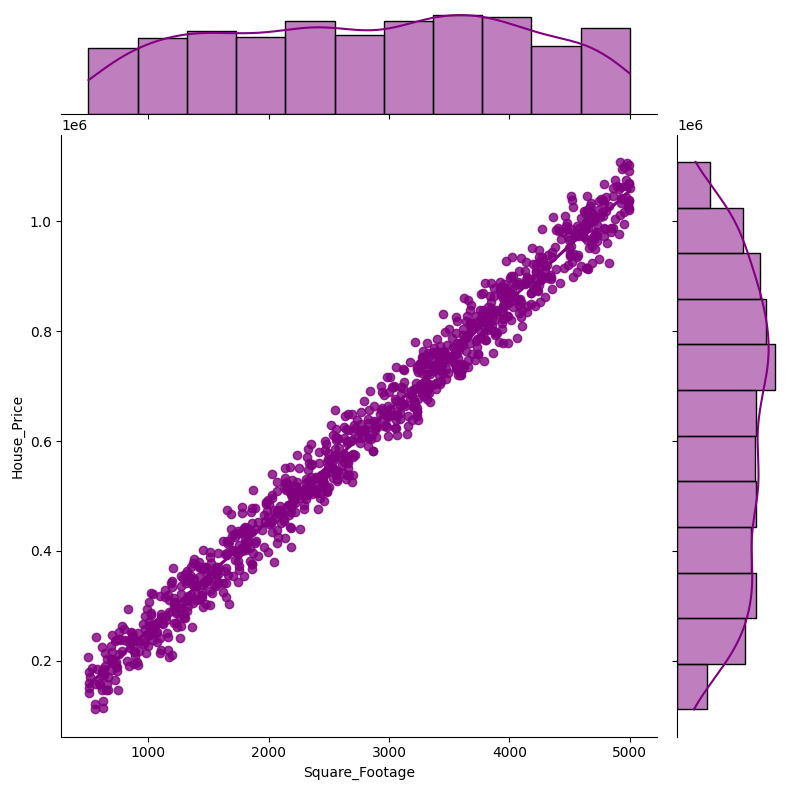

In [37]:
sns.jointplot(x='Square_Footage', y='House_Price', data=df, kind='reg', color='purple', height=8)
plt.show()

### C.3 Multivariate Analysis

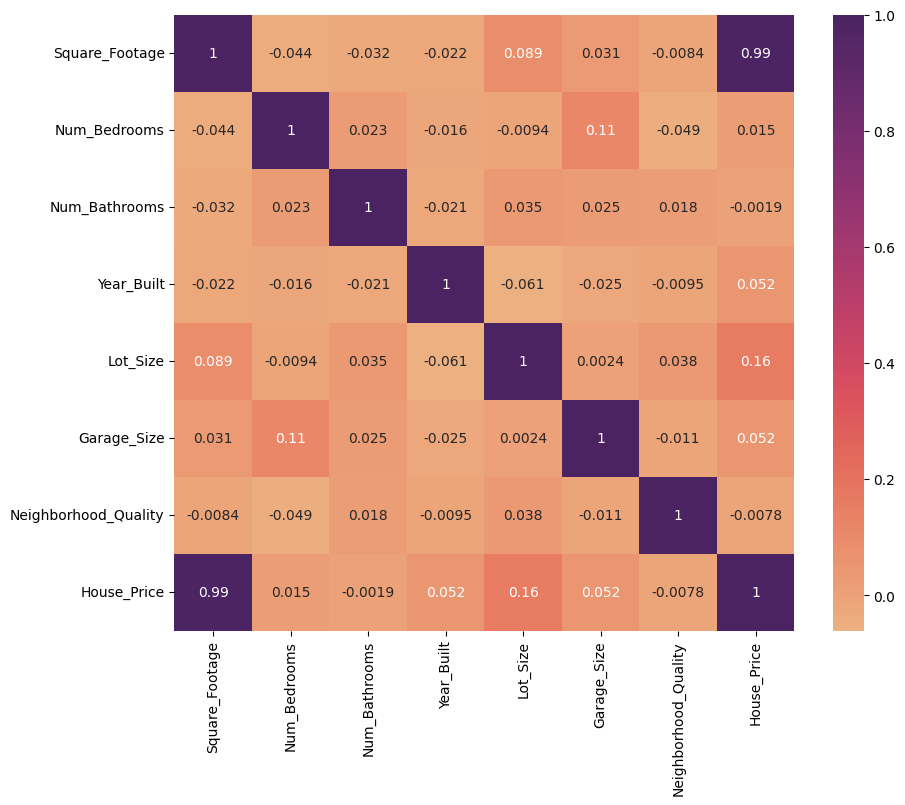

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='flare')
plt.show()

## D. Modelling

## E. Evaluation